In [7]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pyod.models.lof import LOF

normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File("datasets/transients_cleaned_padded.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49666, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49666):
        try:
            dataset_normal[i] = normal_group[str(i)][:]
        except KeyError:
            continue

    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

scalerMinMax = MinMaxScaler()
scalerStandard = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]
X_test_relay          = dataset_relay[47500:]

scalerMinMax.fit(X_train)
X_train_scaled_minmax       = scalerMinMax.transform(X_train)
X_test_norm_scaled_minmax   = scalerMinMax.transform(X_test_normal)
X_test_relay_scaled_minmax  = scalerMinMax.transform(X_test_relay)

scalerStandard.fit(X_train)
X_train_scaled_standard        = scalerStandard.transform(X_train)
X_test_norm_scaled_standard    = scalerStandard.transform(X_test_normal)
X_test_relay_scaled_standard   = scalerStandard.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled_minmax = np.vstack((X_test_norm_scaled_minmax, X_test_relay_scaled_minmax))
X_test_combined_scaled_standard = np.vstack((X_test_norm_scaled_standard, X_test_relay_scaled_standard))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

In [8]:
for n in {1,3,20,50}:
    for m in {"minkowski", "manhattan"}:
        clf = LOF(contamination=0.01, metric=m, n_neighbors=n, novelty=True)
        clf.fit(X_train)

        # pyod.predict: 0 = inlier, 1 = outlier
        y_pred = clf.predict(X_test_combined)

        # cm und report
        cm = confusion_matrix(y_true, y_pred, labels=[1,0])
        print(f"neighbors {n}")
        print(f"metric {m}")
        print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

        # plot
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d",
                    xticklabels=["Relay","Normal"],
                    yticklabels=["Relay","Normal"],
                    cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Konfusionsmatrix")
        plt.tight_layout()
        plt.show()

KeyboardInterrupt: 

70

Classification Report:
               precision    recall  f1-score   support

      Normal       0.74      0.90      0.81      2166
       Relay       0.87      0.68      0.77      2166

    accuracy                           0.79      4332
   macro avg       0.81      0.79      0.79      4332
weighted avg       0.81      0.79      0.79      4332



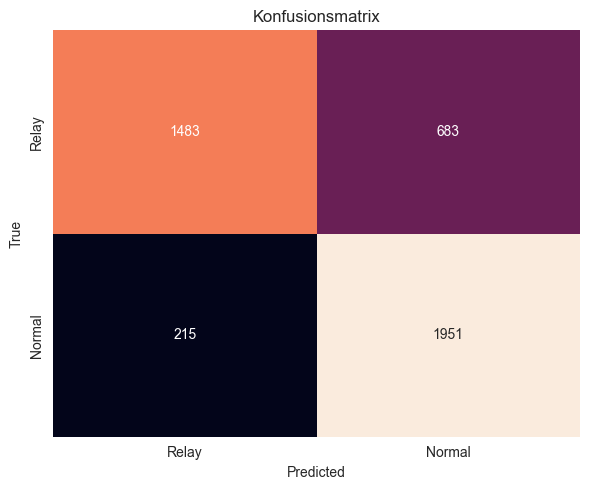

In [11]:
clf = LOF(algorithm= 'auto', contamination= 0.1, leaf_size= 20, metric= 'manhattan', n_neighbors= 50, novelty= True)
clf.fit(X_train)

# pyod.predict: 0 = inlier, 1 = outlier
y_pred = clf.predict(X_test_combined)

# cm und report
cm = confusion_matrix(y_true, y_pred, labels=[1,0])
print(n)
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

# plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["Relay","Normal"],
            yticklabels=["Relay","Normal"],
            cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Konfusionsmatrix")
plt.tight_layout()
plt.show()

neighbors 1
metric manhattan

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.99      0.70      2498
       Relay       0.79      0.05      0.09      2166

    accuracy                           0.55      4664
   macro avg       0.67      0.52      0.40      4664
weighted avg       0.66      0.55      0.42      4664



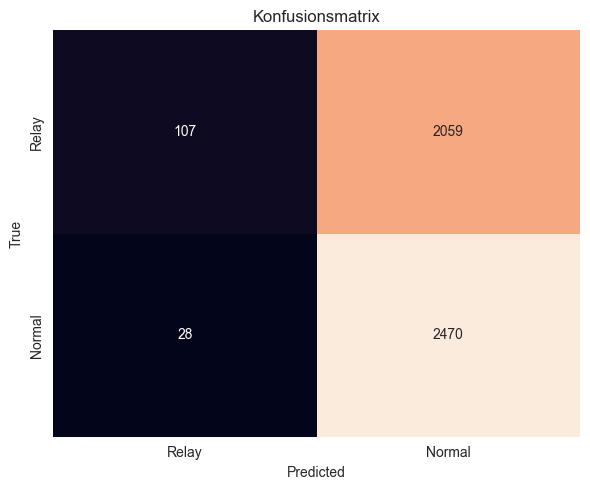

neighbors 1
metric minkowski

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.74      0.04      0.07      2166

    accuracy                           0.55      4664
   macro avg       0.64      0.51      0.38      4664
weighted avg       0.63      0.55      0.41      4664



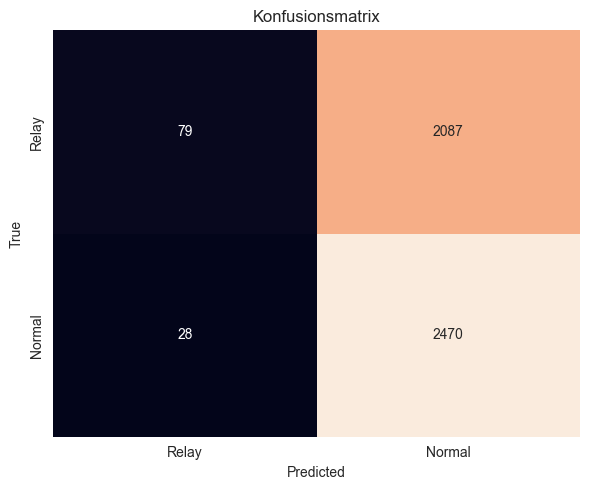

In [ ]:
for n in {1,3,20,50}:
    for m in {"minkowski", "manhattan"}:
        clf = LOF(contamination=0.01, metric=m, n_neighbors=n, novelty=True)
        clf.fit(X_train_scaled_standard)

        # pyod.predict: 0 = inlier, 1 = outlier
        y_pred = clf.predict(X_test_combined_scaled_standard)

        # cm und report
        cm = confusion_matrix(y_true, y_pred, labels=[1,0])
        print(f"neighbors {n}")
        print(f"metric {m}")
        print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

        # plot
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d",
                    xticklabels=["Relay","Normal"],
                    yticklabels=["Relay","Normal"],
                    cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Konfusionsmatrix")
        plt.tight_layout()
        plt.show()

neighbors 10
metric manhattan

Classification Report:
               precision    recall  f1-score   support

      Normal       0.59      0.99      0.74      2498
       Relay       0.96      0.20      0.34      2166

    accuracy                           0.63      4664
   macro avg       0.78      0.60      0.54      4664
weighted avg       0.76      0.63      0.55      4664



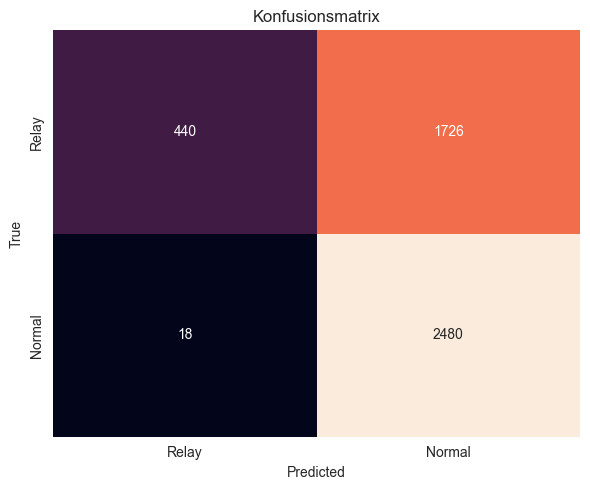

neighbors 10
metric minkowski

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2498
       Relay       0.94      0.16      0.28      2166

    accuracy                           0.61      4664
   macro avg       0.76      0.58      0.51      4664
weighted avg       0.75      0.61      0.52      4664



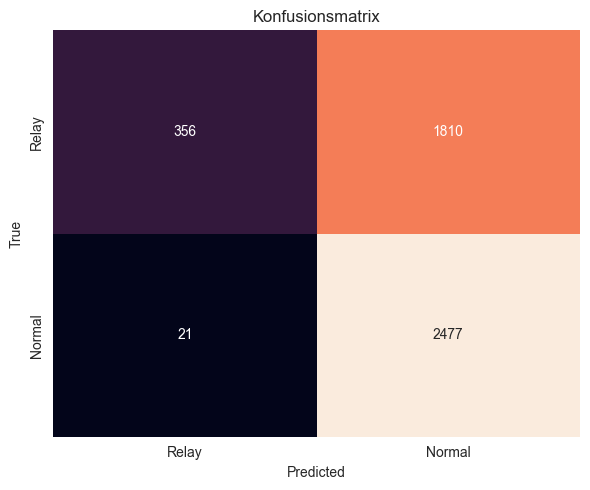

neighbors 100
metric manhattan

Classification Report:
               precision    recall  f1-score   support

      Normal       0.62      0.99      0.76      2498
       Relay       0.97      0.30      0.46      2166

    accuracy                           0.67      4664
   macro avg       0.79      0.65      0.61      4664
weighted avg       0.78      0.67      0.62      4664



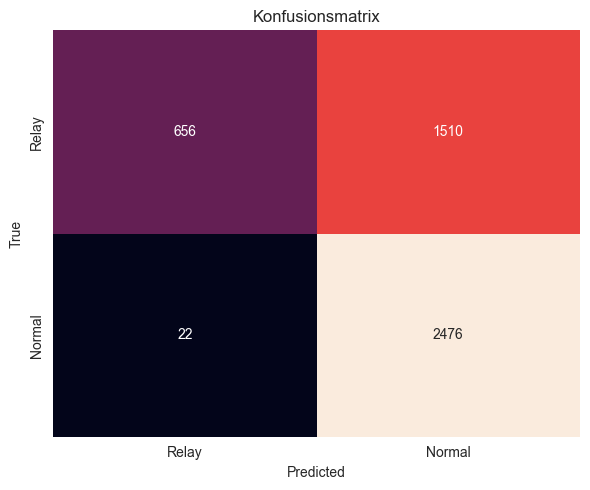

neighbors 100
metric minkowski

Classification Report:
               precision    recall  f1-score   support

      Normal       0.61      0.99      0.76      2498
       Relay       0.96      0.28      0.43      2166

    accuracy                           0.66      4664
   macro avg       0.79      0.63      0.59      4664
weighted avg       0.78      0.66      0.60      4664



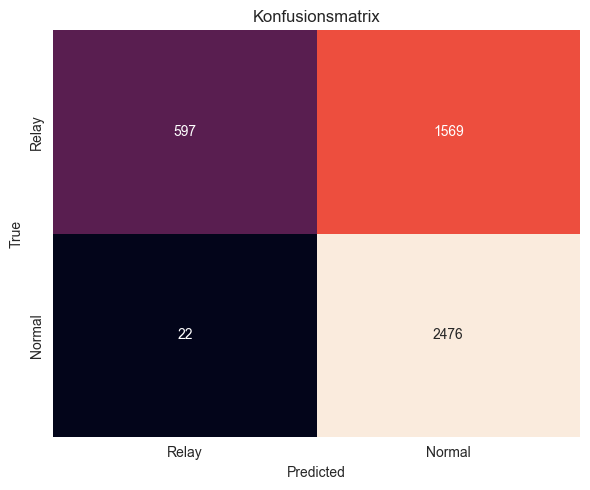

neighbors 50
metric manhattan

Classification Report:
               precision    recall  f1-score   support

      Normal       0.62      0.99      0.77      2498
       Relay       0.97      0.31      0.47      2166

    accuracy                           0.67      4664
   macro avg       0.80      0.65      0.62      4664
weighted avg       0.78      0.67      0.63      4664



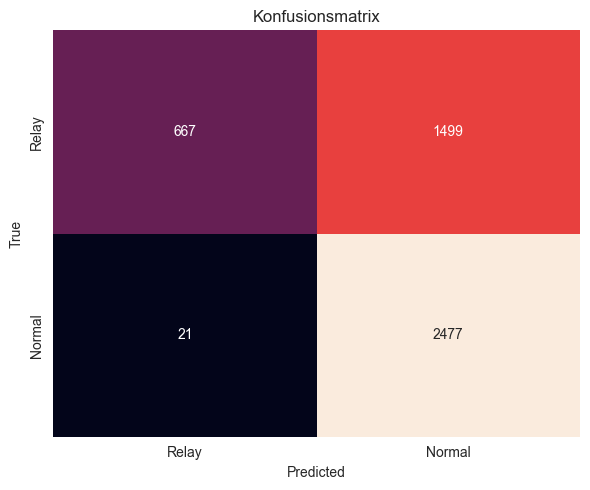

neighbors 50
metric minkowski

Classification Report:
               precision    recall  f1-score   support

      Normal       0.61      0.99      0.75      2498
       Relay       0.96      0.26      0.41      2166

    accuracy                           0.65      4664
   macro avg       0.78      0.62      0.58      4664
weighted avg       0.77      0.65      0.59      4664



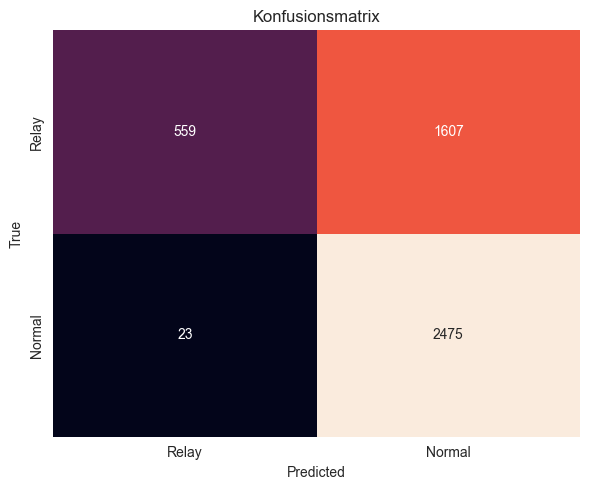

In [4]:
for n in {1,3,20,50}:
    for m in {"minkowski", "manhattan"}:
        clf = LOF(contamination=0.01, metric=m, n_neighbors=n, novelty=True)
        clf.fit(X_train_scaled_minmax)

        # pyod.predict: 0 = inlier, 1 = outlier
        y_pred = clf.predict(X_test_combined_scaled_minmax)

        # cm und report
        cm = confusion_matrix(y_true, y_pred, labels=[1,0])
        print(f"neighbors {n}")
        print(f"metric {m}")
        print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

        # plot
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d",
                    xticklabels=["Relay","Normal"],
                    yticklabels=["Relay","Normal"],
                    cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Konfusionsmatrix")
        plt.tight_layout()
        plt.show()

In [12]:
param_grid = [{
    "n_neighbors": [1, 5, 20, 50],
    "algorithm": ["auto"],
    "leaf_size": [20, 30, 40],
    "metric": ["manhattan"],
    "contamination": [0.01, 0.1, 0.15],
    "novelty": [True]
}]

best_acc = 0
best_params = None

for params in ParameterGrid(param_grid[0]):
    clf = LOF(**params)
    clf.fit(X_train)

    y_pred = clf.predict(X_test_combined)

    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {acc:.4f}  → Params: {params}")

    if acc > best_acc:
        best_acc = acc
        best_params = params

print("\nBeste Parameterkombination:", best_params)
print(f"Beste Accuracy: {best_acc:.4f}")


Accuracy: 0.5388  → Params: {'algorithm': 'auto', 'contamination': 0.01, 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 1, 'novelty': True}
Accuracy: 0.5923  → Params: {'algorithm': 'auto', 'contamination': 0.01, 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 5, 'novelty': True}
Accuracy: 0.6323  → Params: {'algorithm': 'auto', 'contamination': 0.01, 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 20, 'novelty': True}
Accuracy: 0.6674  → Params: {'algorithm': 'auto', 'contamination': 0.01, 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 50, 'novelty': True}
Accuracy: 0.5388  → Params: {'algorithm': 'auto', 'contamination': 0.01, 'leaf_size': 30, 'metric': 'manhattan', 'n_neighbors': 1, 'novelty': True}
Accuracy: 0.5923  → Params: {'algorithm': 'auto', 'contamination': 0.01, 'leaf_size': 30, 'metric': 'manhattan', 'n_neighbors': 5, 'novelty': True}
Accuracy: 0.6323  → Params: {'algorithm': 'auto', 'contamination': 0.01, 'leaf_size': 30, 'metric': 'manhattan